In [1]:
# Downloading Necessary libraries
!pip install tensor-dash

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
# Reading the Training Data
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/plant/train.csv')


In [5]:
# TensorFlow for deep learning
import tensorflow as tf
import tensorflow.keras as keras

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Scikit-learn for splitting the dataset
from sklearn.model_selection import train_test_split

# Tensordash for monitoring training progress
from tensordash.tensordash import Tensordash

# Plotly for interactive visualizations
import plotly.express as px

# JSON for handling JSON data
import json

# Scikit-image for image processing
import skimage.io as io

# Commented out code for user secrets (possibly for authentication)
#user_secrets = UserSecretsClient()
#secret_value_0 = user_secrets.get_secret("email")
#secret_value_1 = user_secrets.get_secret("pin")

In [6]:
dataset

image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]

# Data Exploration and Visualisation


## Data Exploration

In [7]:
# Checking if there are any null values in the dataset
dataset.isnull().any()

image_id             False
healthy              False
multiple_diseases    False
rust                 False
scab                 False
dtype: bool

In [8]:
# Checking the column data type
dataset.dtypes

image_id             object
healthy               int64
multiple_diseases     int64
rust                  int64
scab                  int64
dtype: object

In [9]:
# Adding .jpg extension to every image_id
dataset['image_id'] = dataset['image_id']+'.jpg'

In [10]:
dataset

image_id  healthy  multiple_diseases  rust  scab
0        Train_0.jpg        0                  0     0     1
1        Train_1.jpg        0                  1     0     0
2        Train_2.jpg        1                  0     0     0
3        Train_3.jpg        0                  0     1     0
4        Train_4.jpg        1                  0     0     0
...              ...      ...                ...   ...   ...
1816  Train_1816.jpg        0                  0     0     1
1817  Train_1817.jpg        1                  0     0     0
1818  Train_1818.jpg        1                  0     0     0
1819  Train_1819.jpg        0                  0     1     0
1820  Train_1820.jpg        0                  0     0     1

[1821 rows x 5 columns]

## Data Visualisation

## Classes Distribution

Text(0.5, 1.0, 'Healthy Classes')

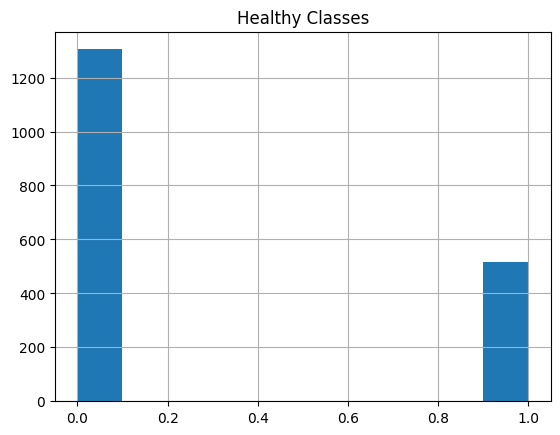

In [11]:
# Create a histogram of the 'healthy' column
dataset.healthy.hist()

# Add a title to the histogram
plt.title('Healthy Classes')

Text(0.5, 1.0, 'Multiple Diseases Classes')

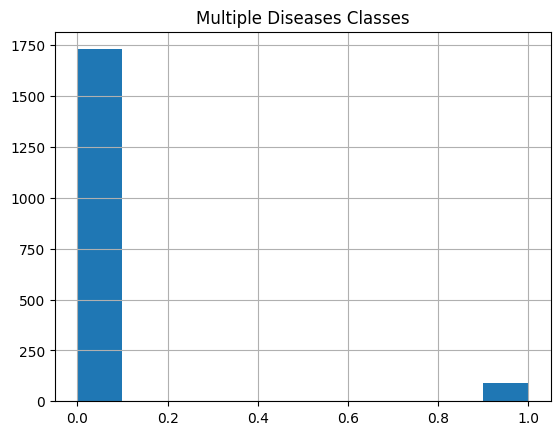

In [12]:
dataset.multiple_diseases.hist()
plt.title('Multiple Diseases Classes')

Text(0.5, 1.0, 'Rust Classes')

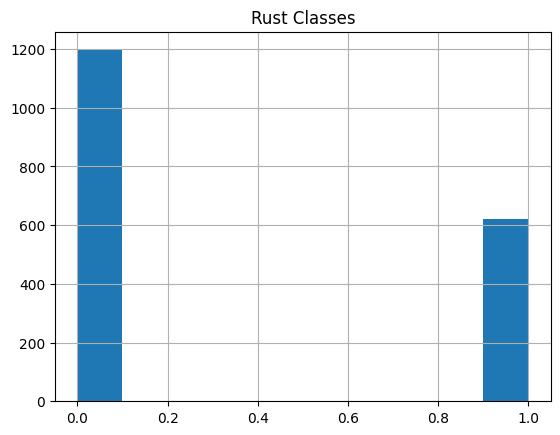

In [13]:
dataset.rust.hist()
plt.title('Rust Classes')

Text(0.5, 1.0, 'Scab Classes')

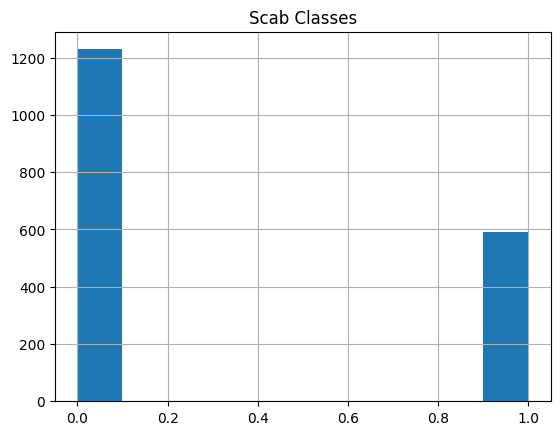

In [14]:
dataset.scab.hist()
plt.title('Scab Classes')

## Class Image Visualisation

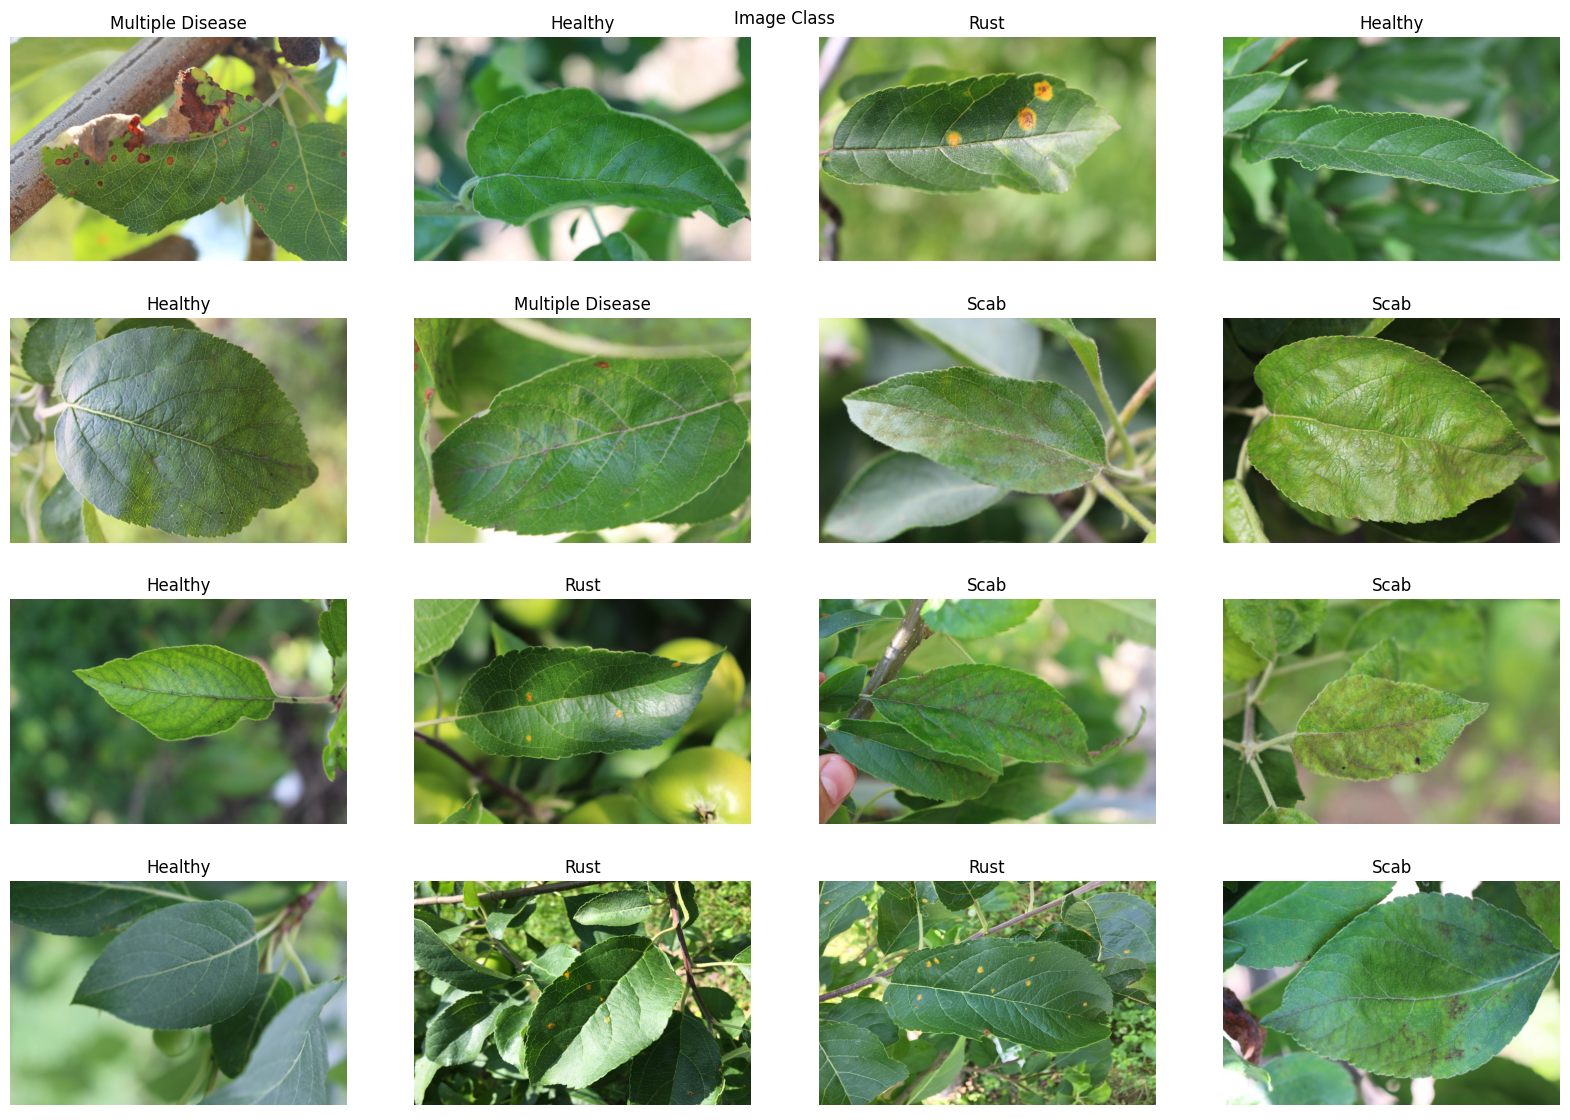

In [15]:
# Set up the figure size and grid layout
w, h = 10, 10
fig = plt.figure(figsize=(20, 14))
columns, rows = 4, 4

# Set the main title and turn off axes for the overall figure
plt.title('Image Class')
plt.axis('off')

# Loop through the grid positions
for i in range(1, columns*rows + 1):
    # Read the image file
    img = plt.imread(f'/content/drive/MyDrive/Colab Notebooks/plant/images/Train_{i}.jpg')

    # Add a subplot for each image
    fig.add_subplot(rows, columns, i)

    # Determine the health status and set the subplot title accordingly
    if dataset.healthy[i] == 1:
        plt.title('Healthy')
    elif dataset.multiple_diseases[i] == 1:
        plt.title('Multiple Disease')
    elif dataset.rust[i] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')

    # Display the image
    plt.imshow(img)
    plt.axis('off')

# Show the entire figure
plt.show()

# Image Segmentation`

Multiple Histogram for different pixles intensity values

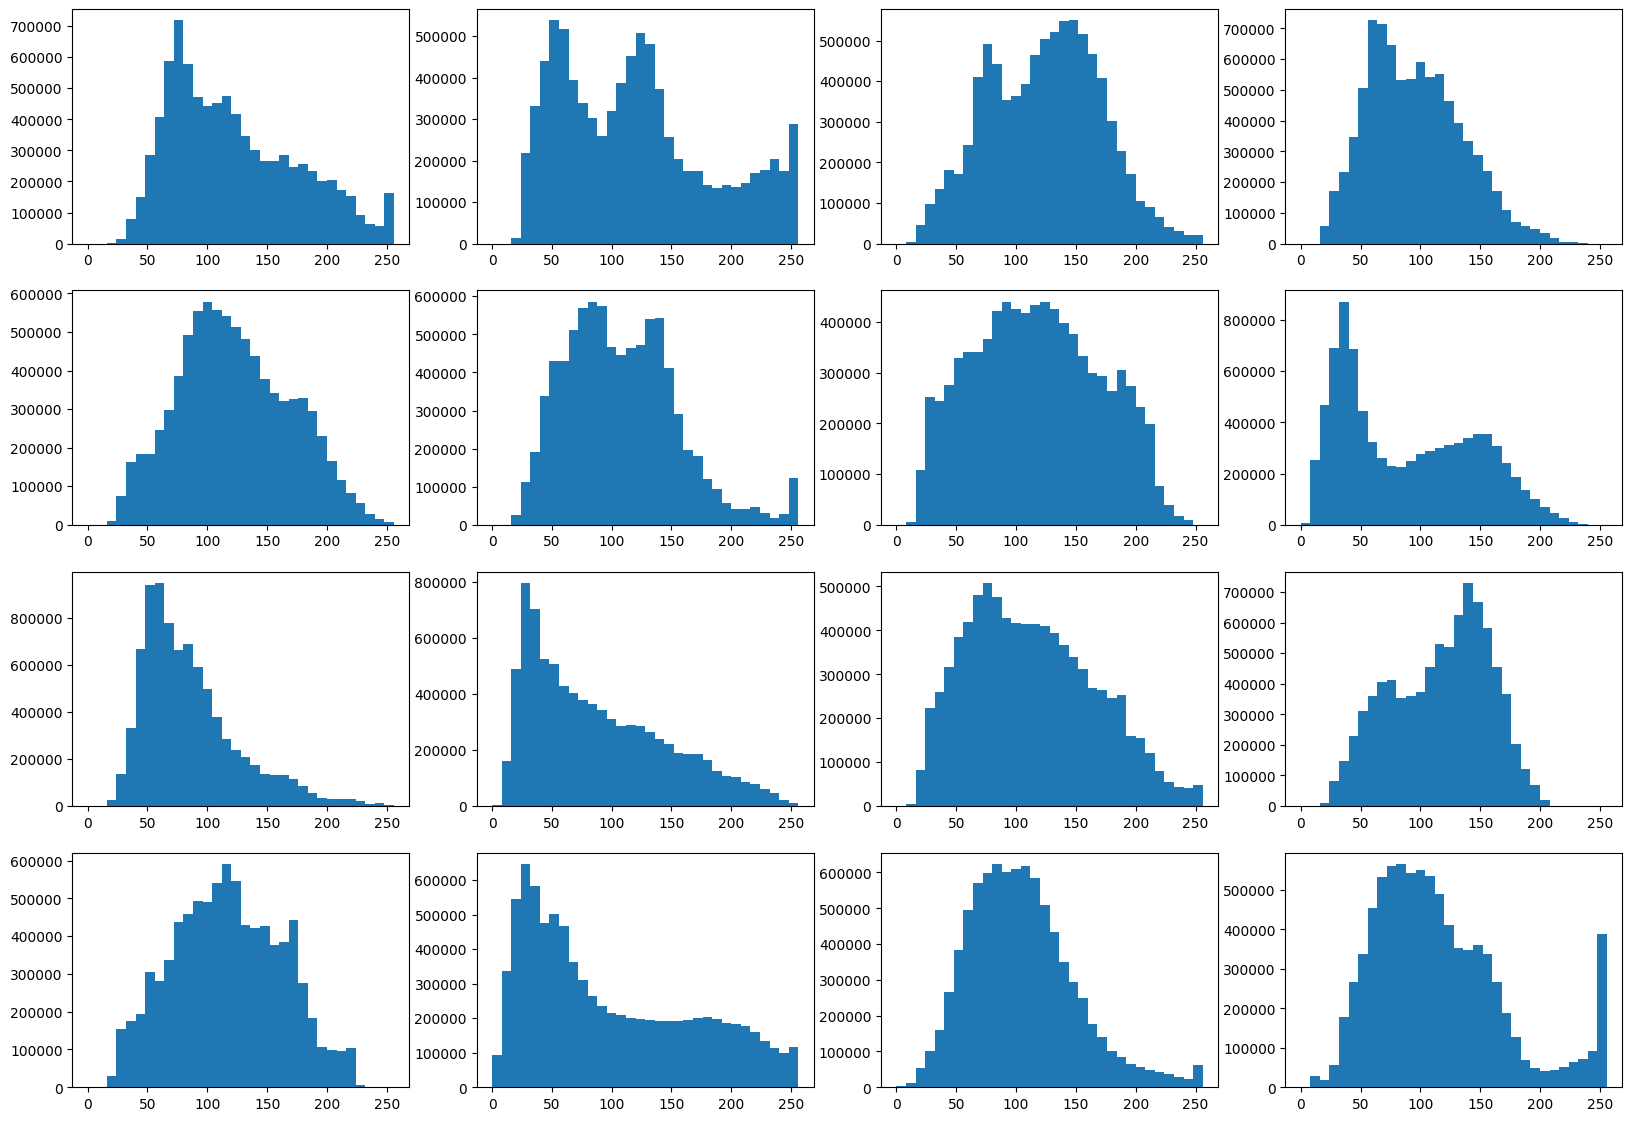

In [16]:
w=10
h=10
# Create a figure with a size of 20x14 inches
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
# Turn off the axes for the main figure
plt.axis('off')
# Loop through 16 images (4x4 grid)
for i in range(1, columns*rows +1):
    # Read an image file from Google Drive
    img = plt.imread(f'/content/drive/MyDrive/Colab Notebooks/plant/images/Train_{i}.jpg')
    # Add a new subplot to the figure
    fig.add_subplot(rows, columns, i)
    # Create a histogram of pixel intensities for the image
    # ravel() flattens the image array, bins=32 sets number of histogram bars
    # range=[0, 256] sets the range of pixel values (0-255 for 8-bit images)
    plt.hist(img.ravel(), bins=32, range=[0, 256])
# Display the entire figure with all subplots
plt.show()

In [17]:
img.shape

(1365, 2048, 3)

# Making Training Data

## Reading data from Keras Generators

In [18]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,  # Normalize pixel values to be between 0 and 1
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True)  # randomly flip images vertically

In [19]:
X_train, X_valid = train_test_split(dataset, test_size=0.05, shuffle=False)

## Making a Tensorflow Dataset

In [20]:
# Setting the batch size for the data generators
BATCH_SIZE = 8

# Creating a training data generator using flow_from_dataframe method
train_generator = datagen.flow_from_dataframe(
                    dataset,  # DataFrame containing training data information
                    directory='/content/drive/MyDrive/Colab Notebooks/plant/images/',  # Directory where images are stored
                    x_col='image_id',  # Column name in the DataFrame that contains image file names
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'],  # Columns with labels for different classes
                    target_size=(512, 512),  # Resizing images to 512x512 pixels
                    class_mode='raw',  # Indicates that the labels are provided as raw values (not one-hot encoded)
                    batch_size=BATCH_SIZE,  # Number of images to be yielded in each batch
                    shuffle=False  # Do not shuffle the order of images
                 )

# Creating a validation data generator using flow_from_dataframe method
valid_generator = datagen.flow_from_dataframe(
                    X_valid,  # DataFrame containing validation data information
                    directory='/content/drive/MyDrive/Colab Notebooks/plant/images/',  # Directory where images are stored
                    x_col='image_id',  # Column name in the DataFrame that contains image file names
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'],  # Columns with labels for different classes
                    target_size=(512, 512),  # Resizing images to 512x512 pixels
                    class_mode='raw',  # Indicates that the labels are provided as raw values (not one-hot encoded)
                    batch_size=BATCH_SIZE,  # Number of images to be yielded in each batch
                    shuffle=False  # Do not shuffle the order of images
                 )


Found 1821 validated image filenames.
Found 92 validated image filenames.


## Generator Images Visualisations

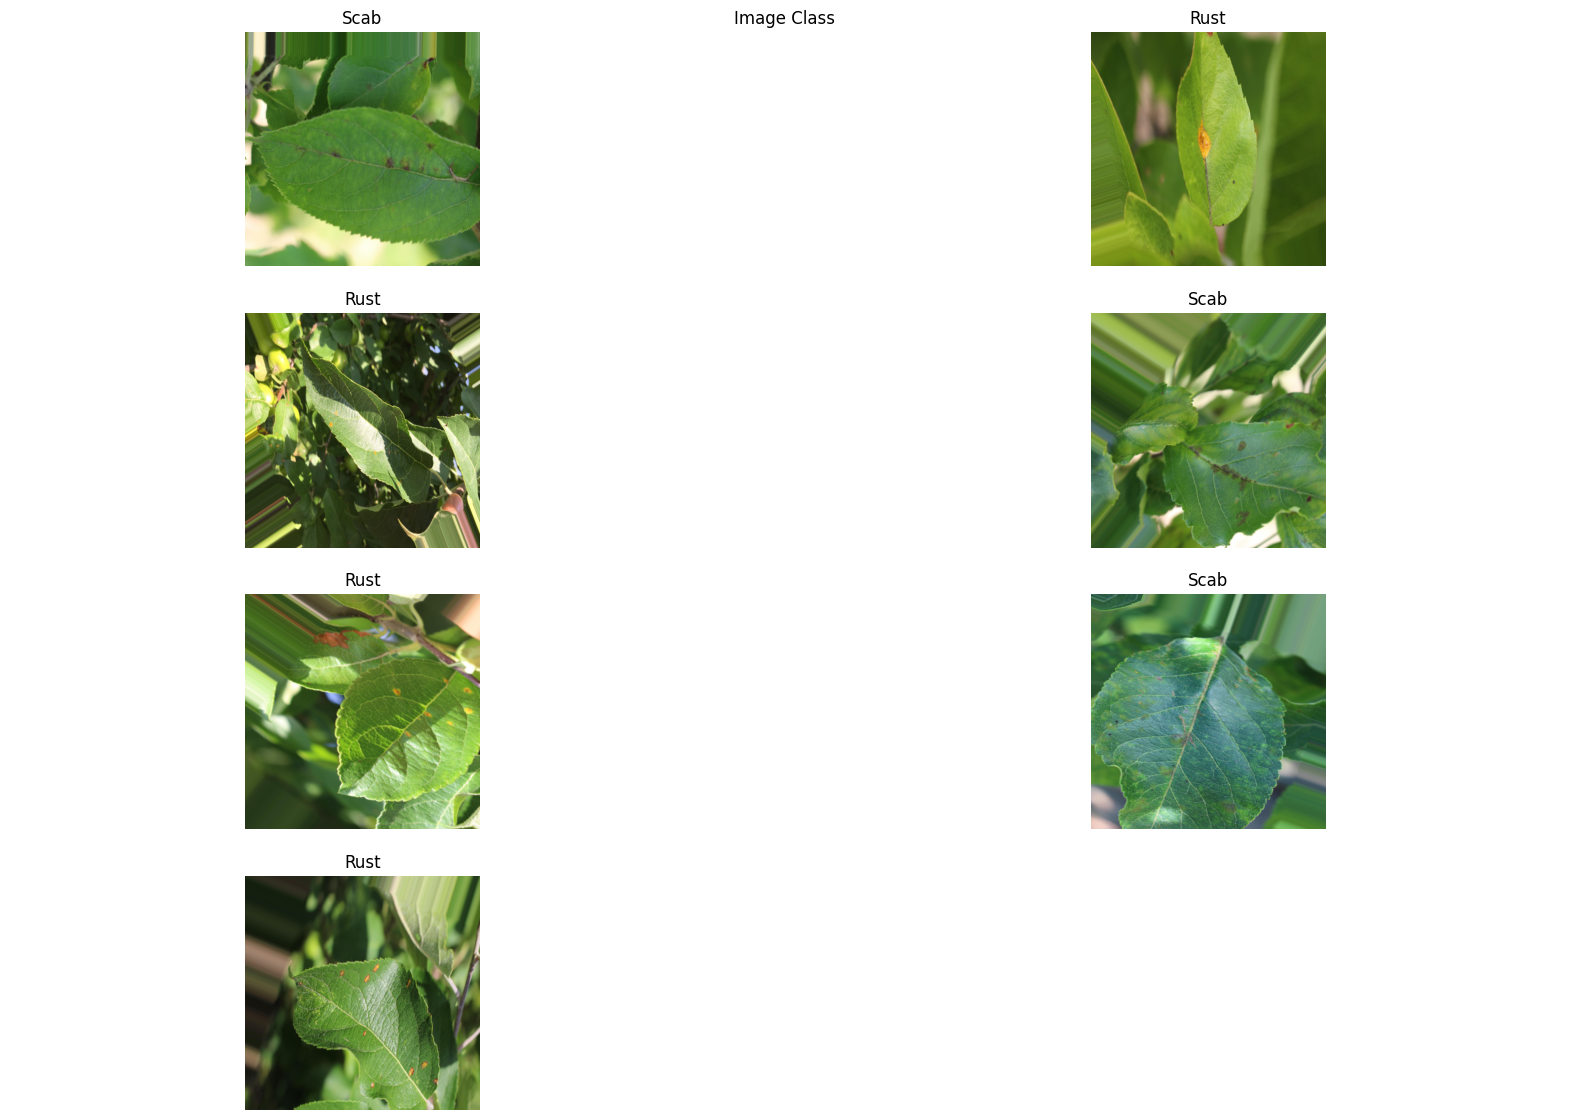

In [24]:
# Setting width and height for each subplot
w = 10
h = 10

# Creating a figure with specified size
fig = plt.figure(figsize=(20, 14))

# Number of columns and rows for the subplots
columns = 2
rows = 4

# Setting the title for the entire plot and removing axis labels
plt.title('Image Class')
plt.axis('off')

# Loop to iterate through subplots
for i in range(1, columns * rows):
    # Getting the next batch of images and labels from the training generator
    img_batch, label_batch = train_generator.next()

    # Adding a subplot at the specified position
    fig.add_subplot(rows, columns, i)

    # Setting the title of each subplot based on the label
    if label_batch[i][0] == 1:
        plt.title('Healthy')
    elif label_batch[i][1] == 1:
        plt.title('Multiple Disease')
    elif label_batch[i][2] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')

    # Displaying the image
    plt.imshow(img_batch[i])
    plt.axis('off')

# Showing the plot with all subplots
plt.show()


# Making The Models

## Xception Model

In [25]:
# Creating a Sequential model using the Xception architecture
xception_model = tf.keras.models.Sequential([
    # Adding the Xception model without the top (fully connected) layers, with pre-trained ImageNet weights
    tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(512, 512, 3)),

    # Adding a Global Average Pooling layer to reduce the spatial dimensions of the feature maps
    tf.keras.layers.GlobalAveragePooling2D(),

    # Adding a Dense layer with 4 output units (for 4 classes) and softmax activation for classification
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling the model with Adam optimizer, categorical crossentropy loss, and accuracy as a metric
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Displaying the summary of the model architecture
xception_model.summary()


83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 16, 16, 2048)      20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 20869676 (79.61 MB)
Trainable params: 20815148 (79.40 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


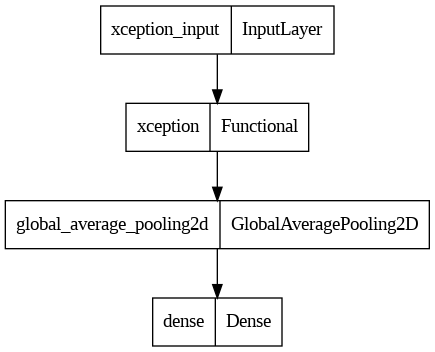

In [26]:
# Plotting the model architecture and saving it as an image file
tf.keras.utils.plot_model(xception_model, to_file='xception_model.png')


## DenseNet121

In [27]:
# Creating a Sequential model using the DenseNet121 architecture
densenet_model = tf.keras.models.Sequential([
    # Adding the DenseNet121 model without the top (fully connected) layers, with pre-trained ImageNet weights
    tf.keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_shape=(512, 512, 3)),

    # Adding a Global Average Pooling layer to reduce the spatial dimensions of the feature maps
    tf.keras.layers.GlobalAveragePooling2D(),

    # Adding a Dense layer with 4 output units (for 4 classes) and softmax activation for classification
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling the model with Adam optimizer, categorical crossentropy loss, and accuracy as a metric
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Displaying the summary of the model architecture
densenet_model.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 16, 16, 1024)      7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 7041604 (26.86 MB)
Trainable params: 6957956 (26.54 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


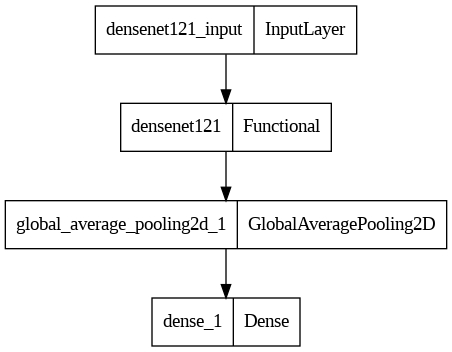

In [30]:
# Plotting the DenseNet model architecture and saving it as an image file
tf.keras.utils.plot_model(densenet_model, to_file='densenet_model.png')


# Ensembling the Models

In [31]:
# Creating an input layer for the model with shape (512, 512, 3)
inputs = tf.keras.Input(shape=(512, 512, 3))

# Passing the inputs through the Xception model
xception_output = xception_model(inputs)

# Passing the inputs through the DenseNet model
densenet_output = densenet_model(inputs)

# Averaging the outputs from both models
outputs = tf.keras.layers.average([densenet_output, xception_output])

# Creating a new model with the combined outputs
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiling the model with Adam optimizer, categorical crossentropy loss, and accuracy as a metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Displaying the summary of the combined model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 4)                    7041604   ['input_3[0][0]']             
                                                                                                  
 sequential (Sequential)     (None, 4)                    2086967   ['input_3[0][0]']             
                                                          6                                       
                                                                                                  
 average (Average)           (None, 4)                    0         ['sequential_1[0][0]',    

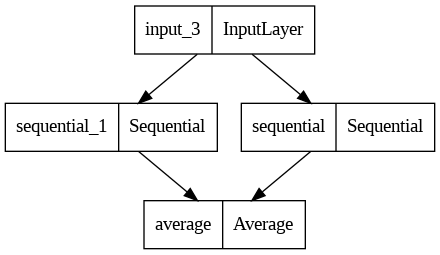

In [33]:
# Plotting the combined model architecture and saving it as an image file
tf.keras.utils.plot_model(model, to_file='model.png')


## Setting the hyperparameters & Callbacks

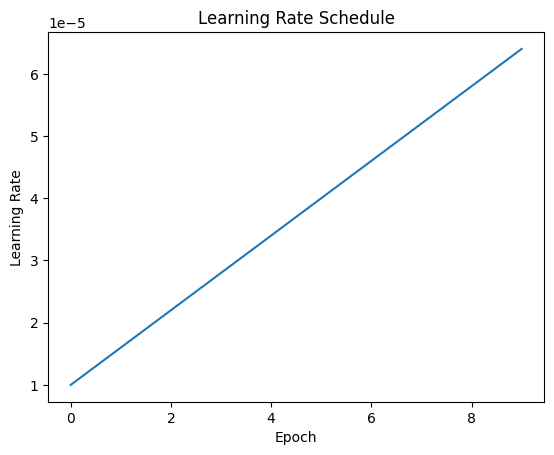

Learning rate schedule: 1e-05 to 6.4e-05 to 6.4e-05


In [34]:
# Setting initial, maximum, and minimum learning rates
LR_START = 0.00001
LR_MAX = 0.0001
LR_MIN = 0.00001

# Setting the number of epochs for ramp-up, sustain, and exponential decay phases
LR_RAMPUP_EPOCHS = 15
LR_SUSTAIN_EPOCHS = 3
LR_EXP_DECAY = 0.8
EPOCHS = 10

# Defining the learning rate function that changes over epochs
def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        # Linearly increasing learning rate during the ramp-up phase
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        # Keeping the learning rate constant during the sustain phase
        lr = LR_MAX
    else:
        # Exponentially decreasing learning rate during the decay phase
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

# Creating a LearningRateScheduler callback using the defined learning rate function
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

# Generating values to plot the learning rate schedule
rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]

# Plotting the learning rate schedule
plt.plot(rng, y)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

# Printing the learning rate schedule range
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))


In [35]:
# Creating a ModelCheckpoint callback to save the model during training
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model.h5',  # File path to save the model
    monitor='val_accuracy',  # Metric to monitor for saving the best model
    verbose=2,  # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    save_best_only=True  # Only save the model if the monitored metric improves
)

# Tensordash is used for getting live model training status, like accuracy or loss,
#histories = Tensordash(
   # email = secret_value_0,
   # password = secret_value_1,
#    ModelName = "Plant Disease Model")

# Training the Model

In [36]:
# Training the model using the fit_generator method
model_history = model.fit_generator(
    train_generator,  # Training data generator
    epochs=EPOCHS,  # Number of epochs to train the model
    validation_data=valid_generator,  # Validation data generator
    callbacks=[model_checkpoint, lr_callback]  # List of callbacks to use during training
)


<ipython-input-36-15a7a2de75da>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(



Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/10
228/228 [==============================] - ETA: 0s - loss: 1.0688 - accuracy: 0.6321
Epoch 1: val_accuracy improved from -inf to 0.86957, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


228/228 [==============================] - 869s 3s/step - loss: 1.0688 - accuracy: 0.6321 - val_loss: 0.6668 - val_accuracy: 0.8696 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.6000000000000003e-05.
Epoch 2/10
228/228 [==============================] - ETA: 0s - loss: 0.5178 - accuracy: 0.8495
Epoch 2: val_accuracy improved from 0.86957 to 0.93478, saving model to model.h5
228/228 [==============================] - 246s 1s/step - loss: 0.5178 - accuracy: 0.8495 - val_loss: 0.2321 - val_accuracy: 0.9348 - lr: 1.6000e-05

Epoch 3: LearningRateScheduler setting learning rate to 2.2e-05.
Epoch 3/10
228/228 [==============================] - ETA: 0s - loss: 0.3121 - accuracy: 0.9050
Epoch 3: val_accuracy improved from 0.93478 to 0.96739, saving model to model.h5
228/228 [==============================] - 246s 1s/step - loss: 0.3121 - accuracy: 0.9050 - val_loss: 0.1142 - val_accuracy: 0.9674 - lr: 2.2000e-05

Epoch 4: LearningRateScheduler setting learning rat

#Saving history

In [37]:
# Saving the training history to a CSV file
pd.DataFrame(model_history.history).to_csv('ModelHistory.csv')


### Model History Visualisation

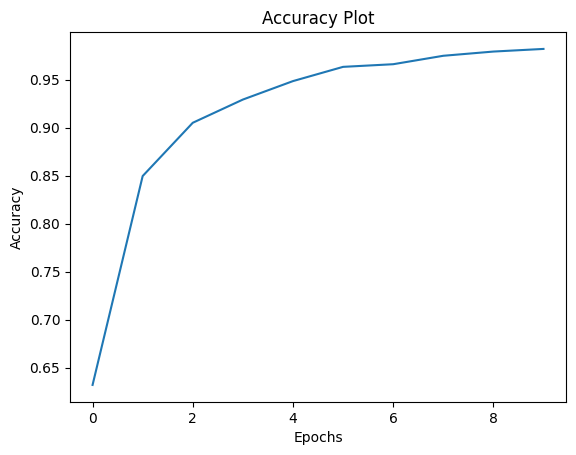

In [38]:
# Plotting the training accuracy over epochs
plt.plot(pd.DataFrame(model_history.history)['accuracy'])
plt.title("Accuracy Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


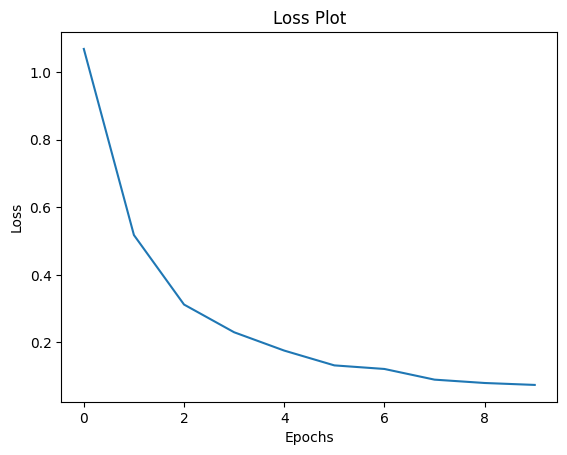

In [39]:
# Plotting the training loss over epochs
plt.plot(pd.DataFrame(model_history.history)['loss'])
plt.title("Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


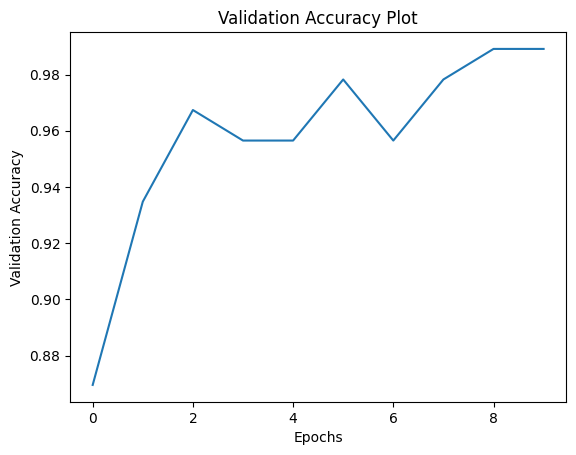

In [40]:
# Plotting the validation accuracy over epochs
plt.plot(pd.DataFrame(model_history.history)['val_accuracy'])
plt.title("Validation Accuracy Plot")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()


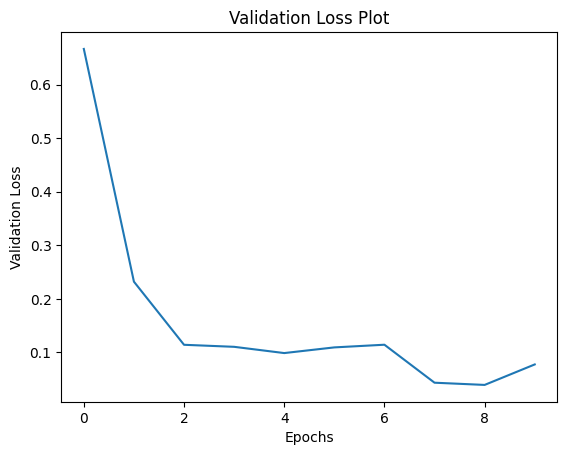

In [41]:
# Plotting the validation loss over epochs
plt.plot(pd.DataFrame(model_history.history)['val_loss'])
plt.title("Validation Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()


# Predicting Classes

In [42]:
# Reading the testing data from a CSV file
test_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/plant/test.csv')

# Reading the sample submission data from a CSV file
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/plant/sample_submission.csv')

# Displaying the test dataset
test_dataset


image_id
0        Test_0
1        Test_1
2        Test_2
3        Test_3
4        Test_4
...         ...
1816  Test_1816
1817  Test_1817
1818  Test_1818
1819  Test_1819
1820  Test_1820

[1821 rows x 1 columns]

In [43]:
# Adding .jpg extension to image_id
test_dataset['image_id'] = test_dataset['image_id']+'.jpg'

In [ ]:
# Creating a test data generator using flow_from_dataframe method
test_gen = datagen.flow_from_dataframe(
    test_dataset,  # DataFrame containing test data information
    directory='/content/drive/MyDrive/Colab Notebooks/plant/images/',  # Directory where images are stored
    x_col='image_id',  # Column name in the DataFrame that contains image file names
    target_size=(512, 512),  # Resizing images to 512x512 pixels
    class_mode=None,  # No labels are provided for test data
    shuffle=False,  # Do not shuffle the order of images
    batch_size=8  # Number of images to be yielded in each batch
)


In [1]:
# Predicting the class probabilities for the test data
predictions = model.predict_generator(test_gen)


NameError: name 'model' is not defined

In [ ]:
# Assigning the predicted probabilities to the respective columns in the submission DataFrame
submission['healthy'] = predictions[:, 0]
submission['multiple_diseases'] = predictions[:, 1]
submission['rust'] = predictions[:, 2]
submission['scab'] = predictions[:, 3]


In [ ]:
submission

image_id       healthy  multiple_diseases      rust          scab
0        Test_0  1.176694e-06           0.000134  0.999864  2.832365e-07
1        Test_1  1.742467e-05           0.000059  0.999889  3.403143e-05
2        Test_2  6.829016e-06           0.000025  0.000010  9.999588e-01
3        Test_3  9.996326e-01           0.000002  0.000355  9.657587e-06
4        Test_4  7.632762e-08           0.000001  0.999998  3.011965e-07
...         ...           ...                ...       ...           ...
1816  Test_1816  5.979426e-09           0.000152  0.999848  3.898423e-08
1817  Test_1817  6.747257e-05           0.016849  0.000327  9.827566e-01
1818  Test_1818  2.990050e-04           0.000197  0.999434  7.046784e-05
1819  Test_1819  9.983423e-01           0.000150  0.000723  7.840731e-04
1820  Test_1820  5.538924e-04           0.239125  0.002250  7.580711e-01

[1821 rows x 5 columns]

In [ ]:
submission.to_csv('submission.csv', index=False)